# Importation Bibliothèques

In [1]:
import gymnasium as gym
import bbrl_gymnasium
from moviepy.editor import ipython_display as video_display
from RewardWrapper import RewardWrapper
from PrioritizedReplayAgent import PrioritizedReplayAgent
import matplotlib.pyplot as plt

from LargestFirst import LargestFirst
from RandomDyna import RandomDyna
from FocusedDyna import FocusedDyna

import pandas as pd
import numpy as np

from omegaconf import OmegaConf
# Load YAML config file as DictConfig
config = OmegaConf.load("config.yaml")

Matplotlib backend: module://matplotlib_inline.backend_inline


# Paramètres

In [2]:
epsilon = config.main.epsilon  # parametres pour gerer l'exploration dans epsilongreedy
delta = config.main.delta  #treshold
gamma = 0.95  #discount factor
alpha = config.main.alpha   #learning rate
max_step = config.main.max_step #nombre de pas maximum pour un episode

# Définition des labyrinthes

In [3]:
# environnement 9x6 
env_9x6 = gym.make("MazeMDP-v0", kwargs={"width": 9, "height": 6,
"start_states": [2], "walls": [13, 14, 15, 34, 42, 43, 44],
"terminal_states": [41]}, render_mode="rgb_array", gamma=gamma)

env_9x6.metadata['render_fps'] = 1
env_9x6 = RewardWrapper(env_9x6)
env_9x6.reset()

env_9x6.set_no_agent()
env_9x6.init_draw("The maze 9x6")

# environnement 18x12
env_18x12 = gym.make("MazeMDP-v0", kwargs={"width": 18, "height": 12,
"start_states": [4], "walls": [50,51,52,53,54,62,63,64,65,66, 128,129,140,141,168,169,170,171,172,173,180,181,182,183,184,185],
"terminal_states": [166,167,178,179]}, render_mode="rgb_array", gamma=gamma)

env_18x12.metadata['render_fps'] = 1
env_18x12 = RewardWrapper(env_18x12)
env_18x12.reset()

env_18x12.set_no_agent()
env_18x12.init_draw("The maze 18x12")


Output()

Output()

# Largest First Dyna

### Queue Dyna Priority Based on Prediction Difference Magnitude

In [4]:
QueueDyna = LargestFirst(env_9x6, alpha, delta, epsilon,max_step, render = False, episode= 100)
QueueDyna.execute()


: 

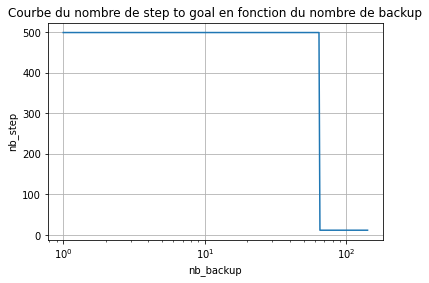

In [5]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Random Dyna

In [6]:
RDyna = RandomDyna(env_9x6, alpha, delta, epsilon, max_step, render = False, episode= 100)
RDyna.execute()

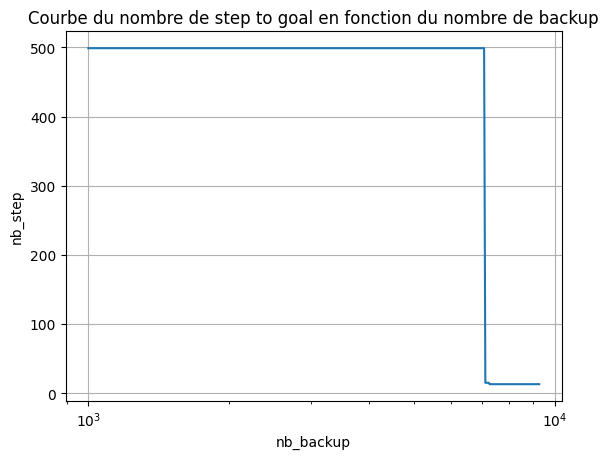

In [7]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)

plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()


# Focused Dyna

In [9]:
FDyna = FocusedDyna(env_9x6, alpha, delta, epsilon,max_step, render = False, episode= 100)
FDyna.execute()


0
1
7
7
1
0
1
7
1
0
1
0
0
0
0
6
7
6
6
7
1
2
1
7
1
1
1
2
8
2
3
2
1
2
2
8
9
3
3
3
3
3
4
10
4
5
5
5
5
4
10
4
10
11
14
14
14
20
19
13
13
10
11
10
11
11
14
11
5
4
4
4
5
11
5
4
4
5
5
4
4
10
11
10
11
11
5
5
5
11
5
4
4
4
10
13
10
11
5
4
4
5
11
11
10
11
11
10
11
10
4
3
2
3
9
9
8
2
8
8
7
8
7
7
1
0
0
6
12
6
12
12
6
12
6
12
6
12
12
15
15
21
27
32
33
34
33
32
32
32
32
27
28
27
27
32
32
33
33
34
34
33
28
33
32
32
33
34
35
34
34
34
34
33
28
27
27
21
27
32
27
28
22
28
22
28
22
16
16
15
15
12
12
6
7
7
1
1
1
1
2
2
1
1
2
3
4
3
9
10
13
19
25
24
23
22
23
22
23
24
30
30
30
24
18
24
18
24
23
17
18
18
24
23
17
17
16
15
12
12
15
21
22
28
29
30
24
25
26
25
25
25
19
20
20
19
20
14
20
14
14
14
14
13
10
13
19
20
26
31
37
36
39
45
46
0
0
1
2
3
9
8
2
8
9
3
9
8
8
2
8
8
7
7
1
1
7
1
1
7
1
0
0
0
0
1
2
1
1
0
6
6
12
15
15
16
16
17
16
22
23
24
25
25
25
25
24
23
29
23
29
23
17
18
24
18
17
18
19
25
25
24
18
17
16
16
22
23
22
28
29
28
22
28
27
27
27
28
22
28
29
23
29
30
30
29
23
22
23
22
23
22
21
15
12
6
7
1
2
2
3
3
3
3
4
4
4

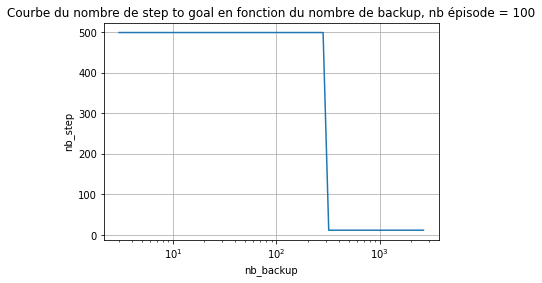

In [10]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {FDyna.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Test SR

In [4]:
from SuccessorRepresentation import FocusedDynaSR

## Small labyrinth

In [5]:
fdsr = FocusedDynaSR(env_9x6, alpha,delta, epsilon, config.sr.episode,config.main.max_step, config.sr.small.train_episode_length, config.sr.small.test_episode_length)

In [6]:
fdsr.stepsFromStart

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 1,
 7: 2,
 8: 3,
 9: 4,
 10: 5,
 11: 6,
 12: 2,
 13: 7,
 14: 7,
 15: 3,
 16: 4,
 17: 5,
 18: 6,
 19: 7,
 20: 9,
 21: 4,
 22: 5,
 23: 6,
 24: 7,
 25: 8,
 26: 9,
 27: 5,
 28: 6,
 29: 7,
 30: 8,
 31: 10,
 32: 6,
 33: 7,
 34: 8,
 35: 9,
 36: 11,
 37: 11,
 38: 13,
 39: 11,
 40: 12,
 41: 16,
 42: 17,
 43: 13,
 44: 12,
 45: 14,
 46: 14}

In [7]:
fdsr.execute()

0
6
6
12
12
12
12
6
7
8
2
2
8
7
7
7
8
2
8
9
3
9
8
2
8
8
9
8
2
2
1
0
0
0
1
7
7
7
7
1
1
1
7
7
1
2
8
7
8
2
3
4
5
5
11
5
5
5
5
5
4
10
11
11
5
5
5
5
11
5
4
4
10
9
9
9
8
7
6
6
6
6
0
1
7
1
0
0
1
2
8
2
8
7
8
2
1
1
0
0
0
0
6
12
6
12
6
7
8
7
6
7
8
7
7
7
6
6
12
12
6
6
6
0
6
0
1
7
7
7
8
2
8
9
3
9
8
7
8
2
8
9
3
3
2
8
7
1
2
8
9
10
11
10
11
10
13
14
20
20
26
25
26
31
31
31
37
37
37
36
35
30
30
35
30
24
25
19
20
20
19
20
19
13
13
10
13
13
13
10
9
8
8
7
6
7
6
7
8
8
2
8
2
1
2
3
4
10
4
3
4
10
4
5
11
14
11
5
4
3
4
4
5
4
3
9
3
3
2
1
1
7
1
0
0
6
7
1
7
1
2
2
2
2
1
7
7
7
8
9
10
11
5
5
5
11
10
13
10
4
5
5
5
5
5
5
5
5
4
4
4
4
10
13
10
11
11
10
4
4
3
3
9
8
7
7
8
7
1
0
0
1
0
6
6
6
6
0
6
7
8
7
6
12
6
6
0
6
0
0
1
1
2
2
2
1
2
8
7
6
6
6
7
6
6
0
6
12
12
12
15
15
15
21
27
32
27
21
27
28
29
23
17
17
17
18
19
18
18
19
25
24
25
25
19
25
24
25
26
25
24
30
35
38
44
45
39
45
45
44
44
45
39
40
40
39
38
44
44
44
45
45
39
36
39
45
44
44
45
45
44
45
39
40
39
36
36
35
34
35
36
37
40
46
0
6
0
0
1
0
6
6
7
6
6
0
0
6
0
0
0
0
6
0
6
12

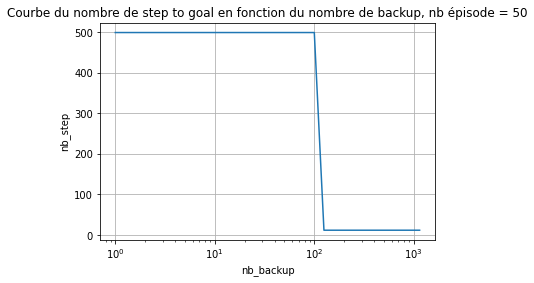

In [8]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {fdsr.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

In [9]:
fdsr = FocusedDynaSR(env_18x12, alpha,delta, epsilon, config.sr.episode,config.main.max_step, config.sr.grand.train_episode_length, config.sr.grand.test_episode_length)

In [11]:
fdsr.stepsFromStart

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 8,
 8: 8,
 9: 11,
 10: 12,
 11: 13,
 12: 1,
 13: 2,
 14: 3,
 15: 4,
 16: 5,
 17: 6,
 18: 7,
 19: 8,
 20: 10,
 21: 10,
 22: 12,
 23: 12,
 24: 2,
 25: 3,
 26: 4,
 27: 5,
 28: 6,
 29: 7,
 30: 8,
 31: 10,
 32: 10,
 33: 11,
 34: 12,
 35: 17,
 36: 3,
 37: 4,
 38: 5,
 39: 6,
 40: 7,
 41: 8,
 42: 9,
 43: 11,
 44: 11,
 45: 13,
 46: 17,
 47: 17,
 48: 4,
 49: 5,
 50: 12,
 51: 14,
 52: 13,
 53: 15,
 54: 18,
 55: 5,
 56: 6,
 57: 12,
 58: 15,
 59: 17,
 60: 17,
 61: 20,
 62: 6,
 63: 7,
 64: 8,
 65: 9,
 66: 11,
 67: 12,
 68: 12,
 69: 19,
 70: 18,
 71: 15,
 72: 20,
 73: 21,
 74: 7,
 75: 8,
 76: 10,
 77: 10,
 78: 11,
 79: 12,
 80: 13,
 81: 16,
 82: 15,
 83: 18,
 84: 21,
 85: 20,
 86: 8,
 87: 9,
 88: 10,
 89: 13,
 90: 14,
 91: 15,
 92: 16,
 93: 16,
 94: 21,
 95: 17,
 96: 20,
 97: 23,
 98: 11,
 99: 12,
 100: 13,
 101: 15,
 102: 17,
 103: 18,
 104: 16,
 105: 17,
 106: 19,
 107: 20,
 108: 23,
 109: 25,
 110: 10,
 111: 12,
 112: 13,
 113: 15,
 114: 17,
 11

In [15]:
fdsr.execute()

0
12
0
0
0
0
12
24
36
36
48
36
24
36
37
25
24
12
12
24
25
13
25
26
38
37
25
26
25
37
25
13
12
13
1
1
1
13
14
15
27
28
27
26
14
2
3
15
14
26
14
15
27
39
39
38
26
14
2
14
13
14
2
3
15
3
4
4
3
3
15
3
15
16
4
4
4
3
15
14
13
14
2
14
15
3
15
3
15
3
15
3
15
3
3
15
16
28
29
41
40
41
42
42
42
41
29
28
27
26
14
26
25
24
25
24
12
24
36
37
25
13
25
13
12
0
1
13
25
26
25
24
25
26
38
39
39
38
39
40
28
40
39
40
39
40
28
16
17
5
4
4
4
5
17
29
41
42
30
29
30
18
30
42
43
44
43
50
50
51
50
57
69
70
82
81
80
81
93
105
117
105
117
116
126
127
137
127
127
117
116
115
103
104
116
104
116
126
127
137
138
150
138
139
151
157
163
164
176
188
188
189
0
0
1
13
12
24
24
24
24
36
37
25
13
1
0
0
1
0
0
12
0
1
0
0
1
2
3
4
3
15
16
28
16
15
16
15
14
13
25
24
24
24
25
13
25
37
49
48
49
49
48
36
24
12
13
1
0
12
0
12
24
24
24
24
24
24
24
36
24
36
48
49
37
25
24
12
24
24
24
12
0
0
12
0
12
24
12
12
12
13
12
12
24
25
24
36
24
36
37
49
49
37
38
39
38
39
40
40
41
42
43
42
42
41
42
43
31
32
44
32
31
32
20
32
44
51
52
59
71
59
52

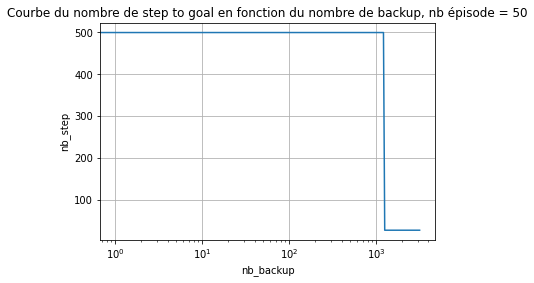

In [16]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {fdsr.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Figure 8

In [17]:
def moyenne_par_indice(liste):
    tableau = np.array(liste)
    moyennes = np.mean(tableau, axis=0)
    moyennes = np.where(np.isnan(moyennes), None, moyennes)
    return moyennes.tolist()

In [19]:
from scipy.interpolate import interp1d

all_steps_lg = []
all_backups_lg = []

all_steps_rd = []
all_backups_rd = []

all_steps_fc = []
all_backups_fc = []

all_steps_sr = []
all_backups_sr = []

nb_exec = 2
for i in range(nb_exec):
    QueueDyna = LargestFirst(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    QueueDyna.execute()
    print(i)
    data = pd.read_csv("executionInformation.csv")

    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_lg.append(nb_steps[:-2])
    all_backups_lg.append(nb_backup[:-2])

    RDyna = RandomDyna(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    RDyna.execute()
    print(i)
    data = pd.read_csv("executionInformation.csv")
    nb_steps =data.iloc[:, 1].tolist()
    nb_backup =data.iloc[:,0].tolist()
    all_steps_rd.append(nb_steps)
    all_backups_rd.append(nb_backup)

    FDyna = FocusedDyna(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    FDyna.execute()
    data = pd.read_csv("executionInformation.csv")
    print(i)
    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_fc.append(nb_steps)
    all_backups_fc.append(nb_backup)


    
    fdsr.execute()
    data = pd.read_csv("executionInformation.csv")
    print(i)
    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_sr.append(nb_steps)
    all_backups_sr.append(nb_backup)

    




0
0
0
0
0
1
13
25
37
49
56
63
75
76
75
87
88
100
112
122
132
133
134
124
114
115
116
104
116
104
105
117
127
137
138
150
156
157
163
175
187
188
176
177
176
164
176
188
189
0
1
2
1
1
13
25
13
1
0
1
2
3
15
27
26
27
26
14
13
25
37
25
37
36
36
37
49
56
55
55
62
63
75
63
64
76
77
78
79
80
92
104
92
104
105
117
105
117
127
117
127
137
136
137
138
138
139
140
152
153
152
153
159
158
159
165
159
165
159
165
159
165
177
177
189
0
0
0
12
13
12
13
25
37
49
56
63
64
63
62
63
75
76
88
89
101
102
103
115
116
115
103
102
101
102
114
124
125
135
147
146
147
148
149
148
147
147
148
154
155
156
157
163
164
165
177
189
0
0
1
0
12
12
24
25
26
14
15
3
15
14
26
38
37
49
56
63
62
55
62
74
75
87
86
74
75
76
88
100
101
102
103
115
125
135
136
148
154
148
149
155
161
173
185
186
186
185
184
172
171
172
173
174
175
176
164
163
164
176
188
187
188
187
188
188
176
175
176
164
163
175
187
188
188
189
0
1
13
25
37
38
39
38
37
49
56
55
62
63
62
55
62
62
63
64
76
88
87
99
98
86
86
98
110
98
110
111
121
120
110
98
98


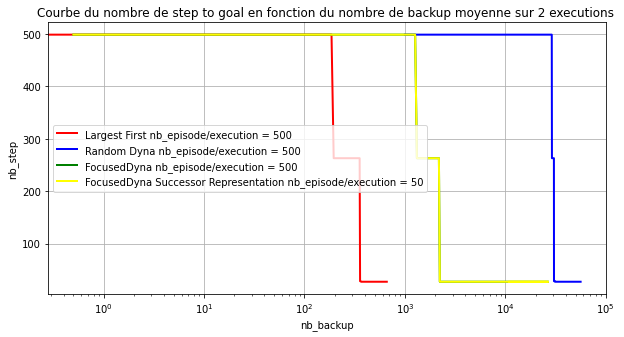

In [23]:
plt.figure(figsize=(10,5))
plt.plot(moyenne_par_indice(all_backups_lg), moyenne_par_indice(all_steps_lg), color='red', linewidth=2, label = f"Largest First nb_episode/execution = {QueueDyna.episode}")

plt.plot(moyenne_par_indice(all_backups_rd), moyenne_par_indice(all_steps_rd) ,color='blue', linewidth=2, label = f"Random Dyna nb_episode/execution = {RDyna.episode}")

plt.plot(moyenne_par_indice(all_backups_fc), moyenne_par_indice(all_steps_fc), color='green', linewidth=2, label = f"FocusedDyna nb_episode/execution = {FDyna.episode}")


plt.plot(moyenne_par_indice(all_backups_sr), moyenne_par_indice(all_steps_sr), color='yellow', linewidth=2, label = f"FocusedDyna Successor Representation nb_episode/execution = {fdsr.episode}")



plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup moyenne sur {nb_exec} executions ')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("img/fig-8.png")
plt.show()